In [1]:
#Import the Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Import the data file
car_data = pd.read_csv(r"E:\DS_ML_PYTHON\DS_ML\Module4_Machine_Learning\Supervised_ML\Day14_Linear_regression\Coding_understanding\Input_files\car data.csv")

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#Get count of rows and columns
car_data.shape

(301, 9)

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
#Check for null values
car_data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
#String Columns
car_columns =['Fuel_Type', 'Seller_Type', 'Transmission']

In [12]:
#Convert string categorical to integer category
for col in car_columns:
    car_data[col] = car_data[col].astype('category')
    car_data[col]= car_data[col].cat.codes

In [13]:
car_data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type           int8
Seller_Type         int8
Transmission        int8
Owner              int64
dtype: object

In [16]:
#Split the data into IV's and DV
X = car_data.drop(['Car_Name','Selling_Price'], axis=1)
y= car_data['Selling_Price']

In [19]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


In [23]:
car_data.Transmission.value_counts()

1    261
0     40
Name: Transmission, dtype: int64

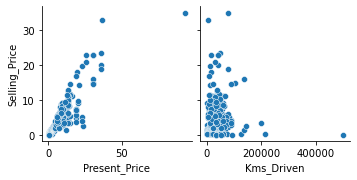

In [27]:
#Check for Linear Relation ship
sns.pairplot(car_data, x_vars=['Present_Price', 'Kms_Driven'], y_vars=['Selling_Price'])

In [51]:
car_data.loc[:,['Present_Price', 'Kms_Driven']].corr()

,Present_Price,Kms_Driven
Present_Price,1.000000,0.203647
Kms_Driven,0.203647,1.000000


In [30]:
#Split the data into Train data and Test data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20)


In [31]:
len(X_train), len(X_test) #80% | 20% Split

(240, 61)

In [32]:
#Call the model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred =lin_reg.predict(X_test)

In [38]:
X_test.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
276,2015,13.60,24800,2,0,1,0
282,2014,14.00,63000,1,0,1,0
41,2014,3.98,46706,2,0,1,0
31,2011,4.89,54200,2,0,1,0
0,2014,5.59,27000,2,0,1,0


In [36]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [40]:
lin_reg.predict([[2014,5.59,27000,2,0,1,0]])

C:\Users\Kishore kumar V\pythonconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.86742397])

In [41]:
#Evaluate the prediction
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [42]:
display(r2_score(y_test,y_pred))

0.8959810399026454

In [49]:
def mean_absolute_percentage_error(y_test, y_pred):
    #return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [50]:
mean_absolute_percentage_error(y_test, y_pred)

39.46119746038306

Text(0.5, 1.0, 'Original Selling Price vs Model Predicted')

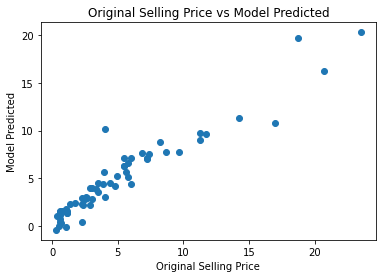

In [53]:
plt.scatter(y_test,y_pred)
plt.xlabel('Original Selling Price')
plt.ylabel('Model Predicted')
plt.title("Original Selling Price vs Model Predicted")